<a href="https://colab.research.google.com/github/Simon-Minchk/Datasetexchangerates/blob/master/Daaataaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

# Install packages in Colab
!pip install category_encoders==2.*
!pip install eli5
!pip install pandas-profiling==2.*
!pip install pdpbox
!pip install shap

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import plotly.graph_objs as go
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp

df = pd.read_csv('https://raw.githubusercontent.com/Simon-Minchk/Datasetexchangerates/master/datasets_478_974_mushrooms.csv')
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [3]:
df['odor'].value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [4]:
pd.crosstab(df['class'], df['odor'])

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


In [0]:
df['class'] = df['class'].replace('e','Edible')
df['class'] = df['class'].replace('p','Poisonous')
df['cap-color'] = df['cap-color'].replace('n','Brown')
df['cap-color'] = df['cap-color'].replace('b','Buff')
df['cap-color'] = df['cap-color'].replace('c','Cinnamon')
df['cap-color'] = df['cap-color'].replace('g','Grey')
df['cap-color'] = df['cap-color'].replace('r','Green')
df['cap-color'] = df['cap-color'].replace('p','Pink')
df['cap-color'] = df['cap-color'].replace('u','Purple')
df['cap-color'] = df['cap-color'].replace('e','Red')
df['cap-color'] = df['cap-color'].replace('w','White')
df['cap-color'] = df['cap-color'].replace('y','Yellow')
df['bruises'] = df['bruises'].replace('t','Yes')
df['bruises'] = df['bruises'].replace('f','No')
df['odor'] = df['odor'].replace('a','Almond')
df['odor'] = df['odor'].replace('l','Anise')
df['odor'] = df['odor'].replace('c','Creosote')
df['odor'] = df['odor'].replace('y','Fishy')
df['odor'] = df['odor'].replace('f','Foul')
df['odor'] = df['odor'].replace('m','Musty')
df['odor'] = df['odor'].replace('n','None')
df['odor'] = df['odor'].replace('p','Pungent')
df['odor'] = df['odor'].replace('s','Spicy')
df['gill-color'] = df['gill-color'].replace('k','Black')
df['gill-color'] = df['gill-color'].replace('n','Brown')
df['gill-color'] = df['gill-color'].replace('b','Buff')
df['gill-color'] = df['gill-color'].replace('h','Chocolate')
df['gill-color'] = df['gill-color'].replace('g','Grey')
df['gill-color'] = df['gill-color'].replace('r','Green')
df['gill-color'] = df['gill-color'].replace('o','Orange')
df['gill-color'] = df['gill-color'].replace('p','Pink')
df['gill-color'] = df['gill-color'].replace('u','Purple')
df['gill-color'] = df['gill-color'].replace('e','Red')
df['gill-color'] = df['gill-color'].replace('w','White')
df['gill-color'] = df['gill-color'].replace('y','Yellow')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('n','Brown')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('b','Buff')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('c','Cinnamon')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('g','Grey')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('o','Orange')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('p','Pink')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('e','Red')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('w','White')
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace('y','Yellow')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('n','Brown')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('b','Buff')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('c','Cinnamon')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('g','Grey')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('o','Orange')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('p','Pink')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('e','Red')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('w','White')
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace('y','Yellow')
df['veil-color'] = df['veil-color'].replace('n','Brown')
df['veil-color'] = df['veil-color'].replace('o','Orange')
df['veil-color'] = df['veil-color'].replace('w','White')
df['veil-color'] = df['veil-color'].replace('y','Yellow')
df['population'] = df['population'].replace('a','Abundant')
df['population'] = df['population'].replace('c','Clustered')
df['population'] = df['population'].replace('n','Numerous')
df['population'] = df['population'].replace('s','Scattered')
df['population'] = df['population'].replace('v','Several')
df['population'] = df['population'].replace('y','Solitary')

Finding Baseline prediction manually


In [6]:
df['class'].value_counts()

Edible       4208
Poisonous    3916
Name: class, dtype: int64

In [7]:
print('Mean Baseline (using 0 features)')

print ('52% accuracy')

Mean Baseline (using 0 features)
52% accuracy


Exploring dataset to find the most important features

In [8]:
pd.crosstab(df['class'], df['gill-size'])

gill-size,b,n
class,,
Edible,3920,288
Poisonous,1692,2224


In [9]:
pd.crosstab(df['class'], df['cap-color'])

cap-color,Brown,Buff,Cinnamon,Green,Grey,Pink,Purple,Red,White,Yellow
class,,,,,,,,,,
Edible,1264,48,32,16,1032,56,16,624,720,400
Poisonous,1020,120,12,0,808,88,0,876,320,672


In [10]:
pd.crosstab(df['class'], df['cap-surface'])

cap-surface,f,g,s,y
class,,,,
Edible,1560,0,1144,1504
Poisonous,760,4,1412,1740


In [11]:
pd.crosstab(df['class'], df['bruises'])

bruises,No,Yes
class,,
Edible,1456,2752
Poisonous,3292,624


In [12]:
pd.crosstab(df['class'], df['stalk-root'])

stalk-root,?,b,c,e,r
class,,,,,
Edible,720,1920,512,864,192
Poisonous,1760,1856,44,256,0


In [13]:
pd.crosstab(df['class'], df['stalk-shape'])

stalk-shape,e,t
class,,
Edible,1616,2592
Poisonous,1900,2016


In [14]:
pd.crosstab(df['class'], df['stalk-surface-above-ring'])

stalk-surface-above-ring,f,k,s,y
class,,,,
Edible,408,144,3640,16
Poisonous,144,2228,1536,8


In [15]:
pd.crosstab(df['class'], df['stalk-surface-below-ring'])

stalk-surface-below-ring,f,k,s,y
class,,,,
Edible,456,144,3400,208
Poisonous,144,2160,1536,76


In [16]:
pd.crosstab(df['class'], df['habitat'])

habitat,d,g,l,m,p,u,w
class,,,,,,,
Edible,1880,1408,240,256,136,96,192
Poisonous,1268,740,592,36,1008,272,0


Splitting the dataset into train validation and test sets for predictive models

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                             random_state=1359)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                             stratify=train['class'], random_state=1359)

In [18]:
val

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1453,Poisonous,f,y,Brown,Yes,Pungent,f,c,n,Pink,e,e,s,s,White,White,p,White,o,p,n,Several,g
4281,Poisonous,x,f,Grey,No,Foul,f,c,b,Chocolate,e,b,k,k,Buff,Pink,p,White,o,l,h,Solitary,p
665,Edible,b,s,Yellow,Yes,Almond,f,c,b,White,e,c,s,s,White,White,p,White,o,p,n,Numerous,m
2867,Edible,x,y,Brown,Yes,None,f,c,b,Purple,t,b,s,s,Pink,Pink,p,White,o,p,n,Solitary,d
5629,Poisonous,f,s,Buff,Yes,Foul,f,c,b,Pink,t,b,f,s,White,White,p,White,o,p,h,Several,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,Poisonous,x,f,Grey,No,Creosote,f,c,n,Purple,e,b,s,s,White,White,p,White,o,p,n,Scattered,d
5938,Edible,k,s,Pink,Yes,None,f,c,b,Red,e,?,s,s,Red,Red,p,White,t,e,w,Clustered,w
3152,Poisonous,x,f,Grey,No,Foul,f,c,b,Chocolate,e,b,k,k,Brown,Pink,p,White,o,l,h,Solitary,d
6511,Poisonous,x,s,Red,No,Foul,f,c,n,Buff,t,?,s,s,Pink,White,p,White,o,e,w,Several,l


In [19]:
train

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5693,Poisonous,x,y,Yellow,No,Foul,f,c,b,Chocolate,e,b,k,k,Pink,Buff,p,White,o,l,h,Several,g
2231,Edible,x,f,Red,Yes,None,f,c,b,White,t,b,s,s,White,Pink,p,White,o,p,k,Several,d
1440,Edible,x,f,Brown,Yes,None,f,c,b,Brown,t,b,s,s,Grey,Pink,p,White,o,p,k,Solitary,d
986,Edible,f,f,White,No,None,f,w,b,Brown,t,e,f,s,White,White,p,White,o,e,k,Abundant,g
1879,Edible,x,s,White,No,None,f,w,b,Brown,t,e,s,s,White,White,p,White,o,e,k,Abundant,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,Poisonous,x,s,White,Yes,Foul,f,c,b,Chocolate,t,b,s,f,White,White,p,White,o,p,h,Scattered,u
5084,Poisonous,x,f,Yellow,No,Foul,f,c,b,Grey,e,b,k,k,Pink,Buff,p,White,o,l,h,Solitary,p
6956,Poisonous,k,s,Red,No,Spicy,f,c,n,Buff,t,?,k,k,White,White,p,White,o,e,w,Several,l
3713,Poisonous,f,y,Yellow,No,Foul,f,c,b,Chocolate,e,b,k,k,Buff,Brown,p,White,o,l,h,Solitary,d


In [20]:
test

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8047,Poisonous,k,s,Red,No,Fishy,f,c,n,Buff,t,?,s,k,Pink,White,p,White,o,e,w,Several,d
3730,Edible,f,f,Red,Yes,None,f,c,b,White,t,b,s,s,Pink,Pink,p,White,o,p,n,Solitary,d
7242,Poisonous,k,s,Brown,No,Fishy,f,c,n,Buff,t,?,s,k,Pink,Pink,p,White,o,e,w,Several,l
6476,Poisonous,x,s,Brown,No,Foul,f,c,n,Buff,t,?,k,s,White,Pink,p,White,o,e,w,Several,l
2995,Edible,f,f,Grey,Yes,None,f,c,b,Purple,t,b,s,s,Grey,Pink,p,White,o,p,k,Several,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,Poisonous,x,y,Grey,No,Foul,f,c,b,Chocolate,e,b,k,k,Pink,Pink,p,White,o,l,h,Solitary,d
6889,Poisonous,f,s,Red,No,Foul,f,c,n,Buff,t,?,k,s,White,Pink,p,White,o,e,w,Several,l
1521,Edible,f,s,White,No,None,f,w,b,Brown,t,e,s,f,White,White,p,White,o,e,k,Scattered,g
442,Edible,x,y,Yellow,Yes,Almond,f,c,b,Pink,e,r,s,y,White,White,p,White,o,p,k,Solitary,p


Wrangling the dataset to prepare everything and remove columns I wont be needing

In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
            
    # Drop useless columns
    Useless = ['cap-shape', 'cap-surface', 'gill-attachment', 'gill-spacing', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'veil-type', 'ring-number', 'ring-type', 'habitat', 'gill-size', 'spore-print-color', 'population', 'veil-color']
    #these arent useless but I decided to remove a bulk of them so that the accuracy would show under 100% since that looks like a mistake
    #as well, I want to isolate the most important categories


    X = X.drop(columns=Useless)
    X = X.dropna()  
    return X
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [22]:
train 

,class,cap-color,bruises,odor,gill-color,stalk-color-above-ring,stalk-color-below-ring
5693,Poisonous,Yellow,No,Foul,Chocolate,Pink,Buff
2231,Edible,Red,Yes,None,White,White,Pink
1440,Edible,Brown,Yes,None,Brown,Grey,Pink
986,Edible,White,No,None,Brown,White,White
1879,Edible,White,No,None,Brown,White,White
...,...,...,...,...,...,...,...
5331,Poisonous,White,Yes,Foul,Chocolate,White,White
5084,Poisonous,Yellow,No,Foul,Grey,Pink,Buff
6956,Poisonous,Red,No,Spicy,Buff,White,White
3713,Poisonous,Yellow,No,Foul,Chocolate,Buff,Brown


More prep work for model

In [0]:
target = 'class'

train_features = train.drop(columns=[target])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

features = numeric_features + categorical_features

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

Random forest model, gives accuracy of over 99%
had to remove quite a few columns from the dataset to get anything less than 100% since that makes it seem like there is a data leakage somewhere when there is not in this case.

When I was testing the most important features I found that odor by itself gave the model 98% accuracy since it is a very defining feature for mushrooms

In [25]:
%%time

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=1359, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9976923076923077
CPU times: user 523 ms, sys: 47.3 ms, total: 570 ms
Wall time: 534 ms


In [26]:
print('Test Accuracy', pipeline.score(X_test, y_test))

Test Accuracy 0.9987692307692307


In [27]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]  # Probability for the last class
y_pred_proba[:10]

array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0.])

In [28]:
roc_auc_score(y_val, y_pred_proba)

1.0

In [29]:
X = df[features]
y = df[target]
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
from itertools import cycle, islice
mycolors = list(islice(cycle(['peru', 'chartreuse']), None, len(df)))

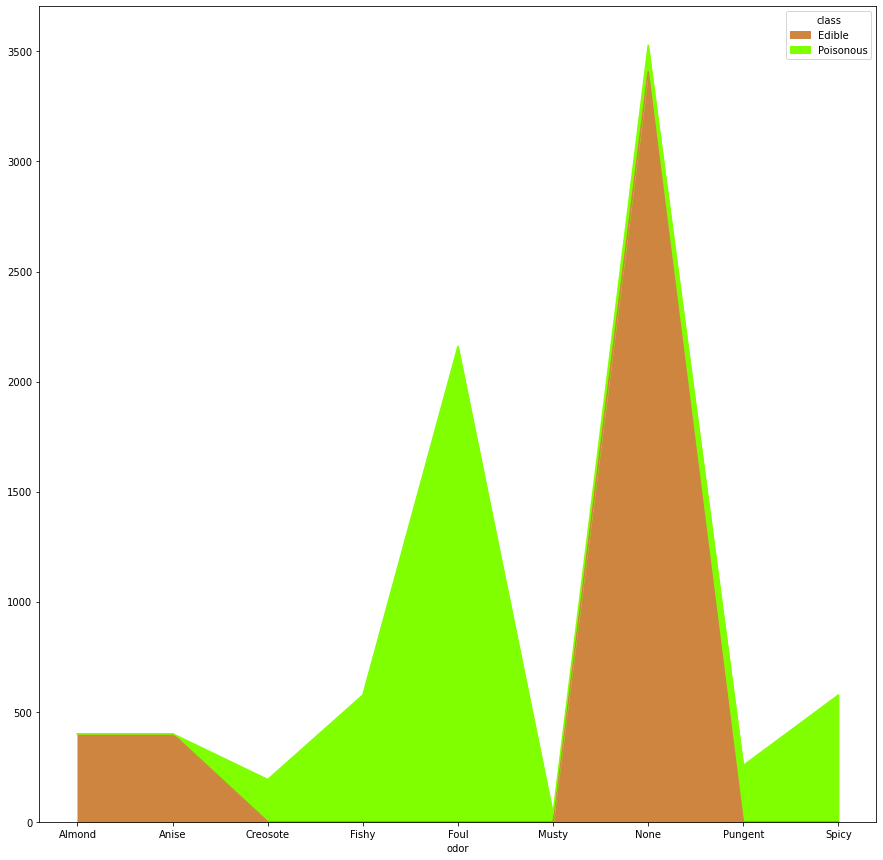

In [31]:
pd.crosstab(df['odor'], df['class']).plot.area(figsize=(15,15), color=mycolors)

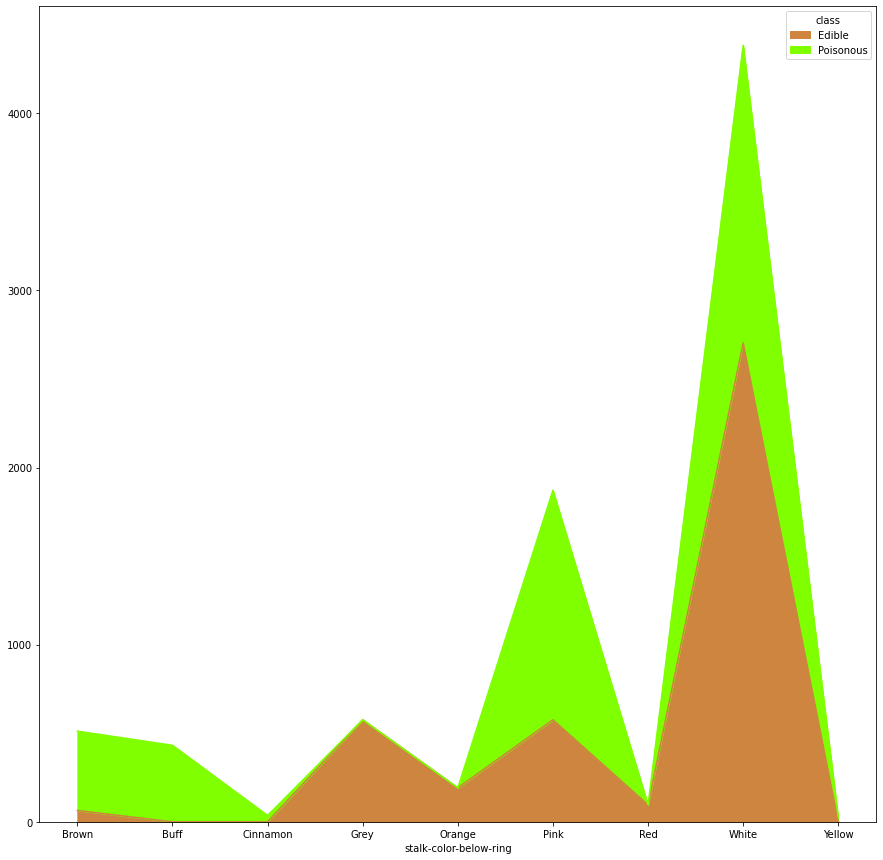

In [0]:
pd.crosstab(df['stalk-color-below-ring'], df['class']).plot.area(figsize=(15,15), color=mycolors)

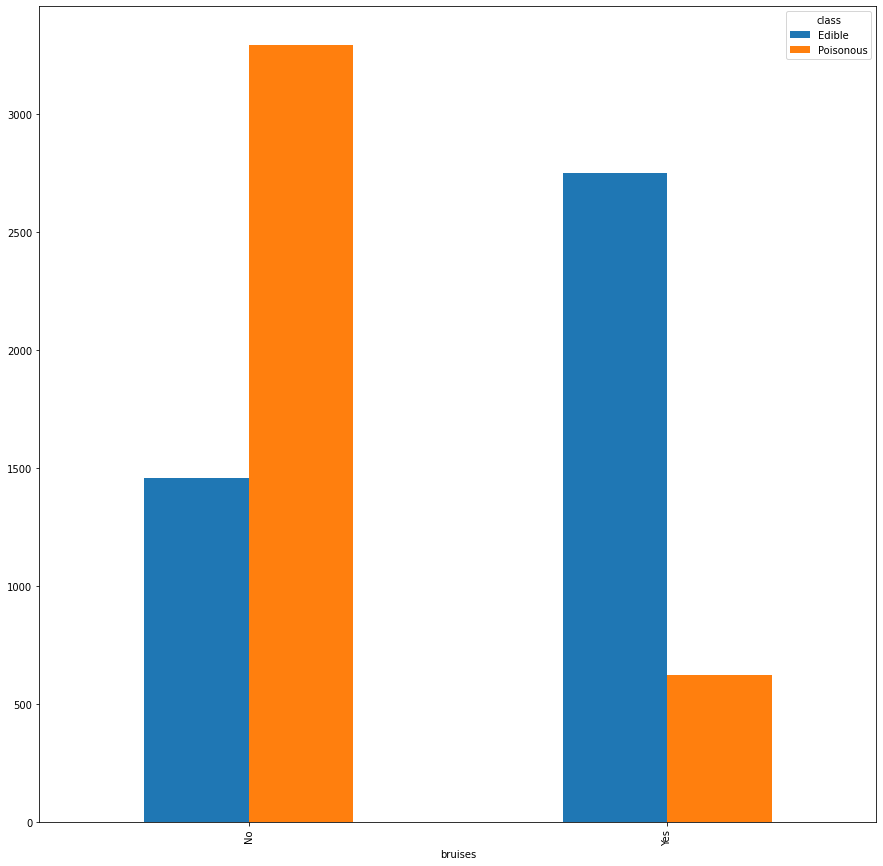

In [40]:
pd.crosstab(df['bruises'], df['class']).plot.bar(figsize=(15,15))

In [37]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 78.63040
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 61.67651
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 80.02491
Feature: 13, Score: 0.00000
Feature: 14, Score: 61.41628
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: 26.78175


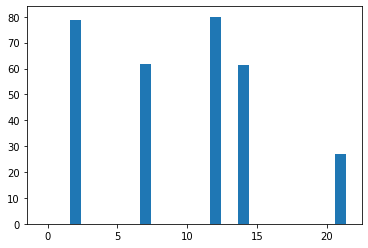

In [38]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=22, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()